# Tutorial 2: Triangular systems and Newton interpolation

In [11]:
# Load packages:

# this package allows to work efficiently with arrays
import numpy as np
# this package is used to draw graphs
import matplotlib.pyplot as plt

We study here numerical methods for the computation of monovariate interpolation polynomials based on an arbitrarily high number of points.  

---

## Construction of the polynomials

We consider an interpolation polynomial $P_N$ of degree $N$ mapping the points $\mathbf{x} = (x_0, ..., x_N)^T$ onto $\mathbf{y} = (y_0, ..., y_N)^T$, i.e. such that 

$$P_N(x_i)=y_i \quad\text{for all} \quad i=0,\dots,N.$$

For a given basis of polynomials $\mathbf{b}(x) = (b_0(x),..., b_N(x))^T$, we are looking for the coefficients $\mathbf{c} = (c_0, ..., c_N)^T$ such that 

$$P_N = \sum\limits_{i=0}^N c_i b_i.$$

The vector $\mathbf{c}$ satisfies a linear problem of the form $A \mathbf{c} = \mathbf{y}.$ 

1) Write down the entries of the matrix $A$ in terms of the basis $\mathbf{b}$ and of the positions $\mathbf{x}$.

**Answer:**
$$A = \begin{bmatrix}
   b_0(x_1) & b_1(x_1) & \ldots & b_N(x_1)\\
   \vdots & \vdots & \ddots & \vdots\\ 
   b_0(x_N) & b_1(x_N) & \ldots & b_N(x_N)\\
\end{bmatrix}$$

2) **Monomial decomposition**: Write down the entries of the matrix $A$ when the basis $\mathbf{b} = \mathbf{m}$ is the canonical basis $\mathbf{m}(x) = (1, x, ..., x^N)^T$. Is the computation of $\mathbf{c}$ straightforward?

**Answer:**
Same as TD

3) **Lagrange decomposition**: Recall how the Lagrange polynomials $\mathbf{l} = (l_0, ..., l_N)^T$ associated with the points $\mathbf{x}$ are defined (e.g. from MAA106). Write down the entries of the matrix $A$ when $\mathbf{b} = \mathbf{l}$.

**Answer:**
Lagrange decomposition of A when b=1
$$A = \begin{bmatrix}
   1 & 0 & \ldots & 0\\
   \vdots & \vdots & \ddots & \vdots\\ 
   1 & 0 & \ldots & 0\\
\end{bmatrix}$$



4) Try to add one new point $(x_{N+1},y_{N+1})$. Can you easily express the new interpolation polynomial $P_{N+1}$ based on the previous one $P_N$?

**Answer:**  

5) **Newton decomposition:** Newton suggested to work with a basis of polynomials $\mathbf{N} = (N_0, N_1, \dots, N_N)^T$ of the form 

$$ N_0(x) = 1, \qquad  N_i(x) := \prod_{j=0}^{i-1} (x-x_j). $$

Write down the entries of the matrix $A$ when $\mathbf{b} = \mathbf{N}$. 

**Answer:**

6) Express $P_{N+1}$ as a function of $P_N$, $x_0,...,x_{N+1}$ and $y_{N+1}$? 

**Answer:**

7)  What property does $A$ satisfy ?

**Answer:**

## Solving linear problem

1) a) In the following, we test our algorithm on the matrices 

$$ L = \left( \begin{array}{ccc} 1 & 0 & 0 \\ 2 & 2 & 0 \\ 3 & 5 & 1 \end{array} \right),\qquad U = \left( \begin{array}{ccc} 5 & 1 & 3 \\ 0 & 2 & 1 \\ 0 & 0 & 1 \end{array} \right).$$

Compute $L^{-1}$, $U^{-1}$ and $L^{-1}b^1$ and $U^{-1} b^2$ for $b^1 = (1,2,4)^T$ and $b^2 = (3,2,1)^T$. 

b) Implement the forward substitution algorithm to solve the problem $Lv=b$ with a lower triangular matrix $L$.

c) Test your algorithm with the matrix $L$ and the vector $b^1$ and compare your solution with the one obtained in 1.a.

d) Implement also the back substitution algorithm for $Uv=b$ with an upper triangular matrix $U$.

e) Test your algorithm with the matrix $U$ and the vector $b^2$ and compare your solution with the one obtained in 1.a.

**Answer**: 

a) 


In [12]:
# b)
def forward_substitution(L,b):
    """
    Compute the solution of a lower triangular system
    ----------   
    parameters:
    L : lower triangular matrix (numpy array of size N,N)
    b : matrix (numpy array of size N)
    
    returns:
    V : solution of the linear problem (numpy array of size N)
    """
    
    ### write your algorithm here
    V = np.ones(len(b))   
    ###
    
    return V

In [13]:
# c)
#Test the function forward substitution with the following parameters
L    = np.array([[1,0,0],[2,2,0],[3,5,1]])
b1   = np.array([1,2,4])

sol1 = forward_substitution(L,b1)

print("solution V = ", sol1)
print("L V = ", np.matmul(L,sol1), "  b = ", b1)

solution V =  [1. 1. 1.]
L V =  [1. 4. 9.]   b =  [1 2 4]


In [14]:
# d)
def back_substitution(U,b):
    """
    Compute the solution of an upper triangular system
    ----------   
    parameters:
    U : upper triangular matrix (numpy array of size N,N)
    b : matrix (numpy array of size N)
    
    returns:
    V : solution of the linear problem (numpy array of size N)
    """
    
    ### write your algorithm here
    V = np.ones(len(b))   
    ###
    
    return V

In [15]:
# e)
#Test the function forward substitution with the following parameters
U    = np.array([[5,1,3],[0,2,1],[0,0,1]])
b2   = np.array([3,2,1])

sol2 = back_substitution(U,b2)

print("solution V = ", sol2)
print("U V = ", np.matmul(U,sol2), "  b = ", b2)

solution V =  [1. 1. 1.]
U V =  [9. 3. 1.]   b =  [3 2 1]


2) In this question, we use this algorithm to compute interpolation polynomials based on an arbitrary number of points. 

a) For the test below, we use for parameters $\mathbf{x} = (0, 1, 2)^T$ and $\mathbf{y} = (1, 3, -1)^T$.
- With this choice of $\mathbf{x}$, what are the Newton polynomials $\mathbf{N}$ (as defined in I.5)?
- Compute (on paper) the coefficients $\mathbf{c}$ in that basis, i.e. such that $P_2 = c_0 N_0 + c_1 N_1 + c_2 N_2$ is the polynomial of degree 2 satisfying $P_2(x_i) = y_i$ for $i=0,1,2$. 

b) Construct a function that computes the coefficients $\mathbf{c}$ of the polynomials $P_N$ in the Newton basis $\mathbf{b} = \mathbf{N}$. 

***Indication:*** you can use one of the functions of the last question for solving a triangular system. 

c) Test your function with the parameters in a) and compare your numerical result with the one expected. 

d) Construct a function that returns $P_N(x)$ based on the abscissa $x$, the coefficients $\mathbf{c}$ of the decomposition $P_N$ in the basis $\mathbf{N}$ and the locations $\mathbf{x} = (x_0,\dots,x_N)^T$.

e) Plot $P_N(x)$ as a function of $x$ using the parameters given in a) and with the coefficients $\mathbf{c}$ obtained in c). Does it pass in $y_i$ at $x_i$ at all $i=0,1,2$?

**Answer**:

a)


In [16]:
# b)
def compute_coeff_Newton(vect_x, vect_y):
    """
    Compute the coefficients of the interpolation polynomial that takes value vect_y in vect_x in Newton's basis
    ----------   
    parameters:
    vect_x : vector of abscissa (x_0, ..., x_N)
    vect_y : vector of values (y_0, ..., y_N) = (P_N(x_0), ..., P_N(x_N))
    
    returns:
    coeff : vector of coefficients of the interpolation polynomial in Newton's basis 
    """
    
    ### write your algorithm here   
    coeff = np.ones(len(vect_y))
    ###
     
    return coeff   

In [17]:
# c)
# Test your algorithm with the following parameters
vect_x = np.array([0, 1, 2])
vect_y = np.array([1, 3, -1])

coeff = compute_coeff_Newton(vect_x, vect_y)
print("coefficients in Newton's basis",coeff)

coefficients in Newton's basis [1. 1. 1.]


In [18]:
# d)
def interpolation_polynomial(x, coeff, vect_x):
    """
    Compute the coefficients of the interpolation polynomial that takes value vect_y in vect_x in Newton's basis
    ----------   
    parameters:
    x      : vector of abscissa where the function is evaluated in the plot
    coeff  : vector of coefficients of the interpolation polynomial in Newton's basis 
    vect_x : vector of interpolation abscissa (x_0, ..., x_N)
    """
    
    ### write your algorithm here   
    val = np.ones(len(x))
    ### 
    
    return val

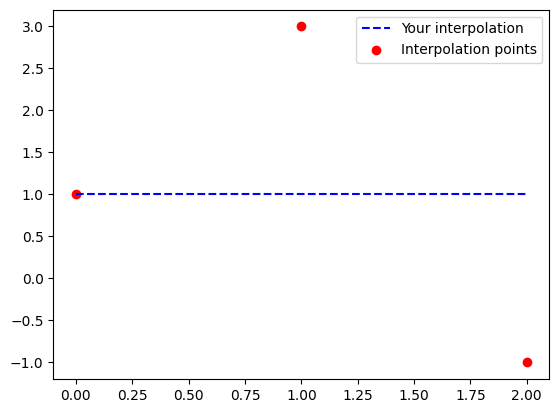

In [19]:
# e)
# Test your algorithm with the following parameters
vect_x = np.array([0, 1, 2])
vect_y = np.array([1, 3, -1])

coeff_interp  = compute_coeff_Newton(vect_x, vect_y)


# vector of abscissa where the function is evaluated in the plot
x_plot = np.linspace(0, 2, 200)
# vector of evaluation P_N(x) in the plot
y_plot = interpolation_polynomial(x_plot, coeff_interp, vect_x)

# plot the interpolation polynomial as a function of x
plt.figure(1)
plt.plot(   x_plot, y_plot, '--', color='blue', label="Your interpolation")
plt.scatter(vect_x, vect_y,       color='red',  label="Interpolation points")
plt.legend()
plt.show()

3) Compare the number of operations required to compute this interpolation polynomials in Lagrange and in Newton's basis. What are the advantages and drawbacks of both methods?

**Answer:**

4) Can you modify the basis polynomials $N_i$ in order to keep the determinant of $A$ independant of $N$.
Can you propose other basis to reduce the number of operations? 

**Answer:**

5) For triangular matrices, the condition number is defined as $Cond(A) = \left(\max\limits_i |A_{i,i}|\right) \left(\max\limits_i \frac{1}{|A_{i,i}|}\right)$. Compute the condition number for the Newton interpolation matrix. Play with diagonal coefficients $A_{i,i}$ and write an interpretation of the influence of the condition number on the result of the present algorithm. What is the other advantage of the choice of question 4?